In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
from mle_toolbox import load_result_logs, visualize
from mle_toolbox.visualize import visualize_1D_lcurves
from neuroevobench.postprocess import filter_log
from neuroevobench.postprocess import plot_task, plot_sensitivity

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


envpool not installed, Atari problems will not work.
envpool not installed, Atari problems will not work.
You need to install brax for Brax tasks:
  pip install git+https://github.com/google/brax.git@main


### Load Hyper & Meta-Log

(0.5, 0.9)

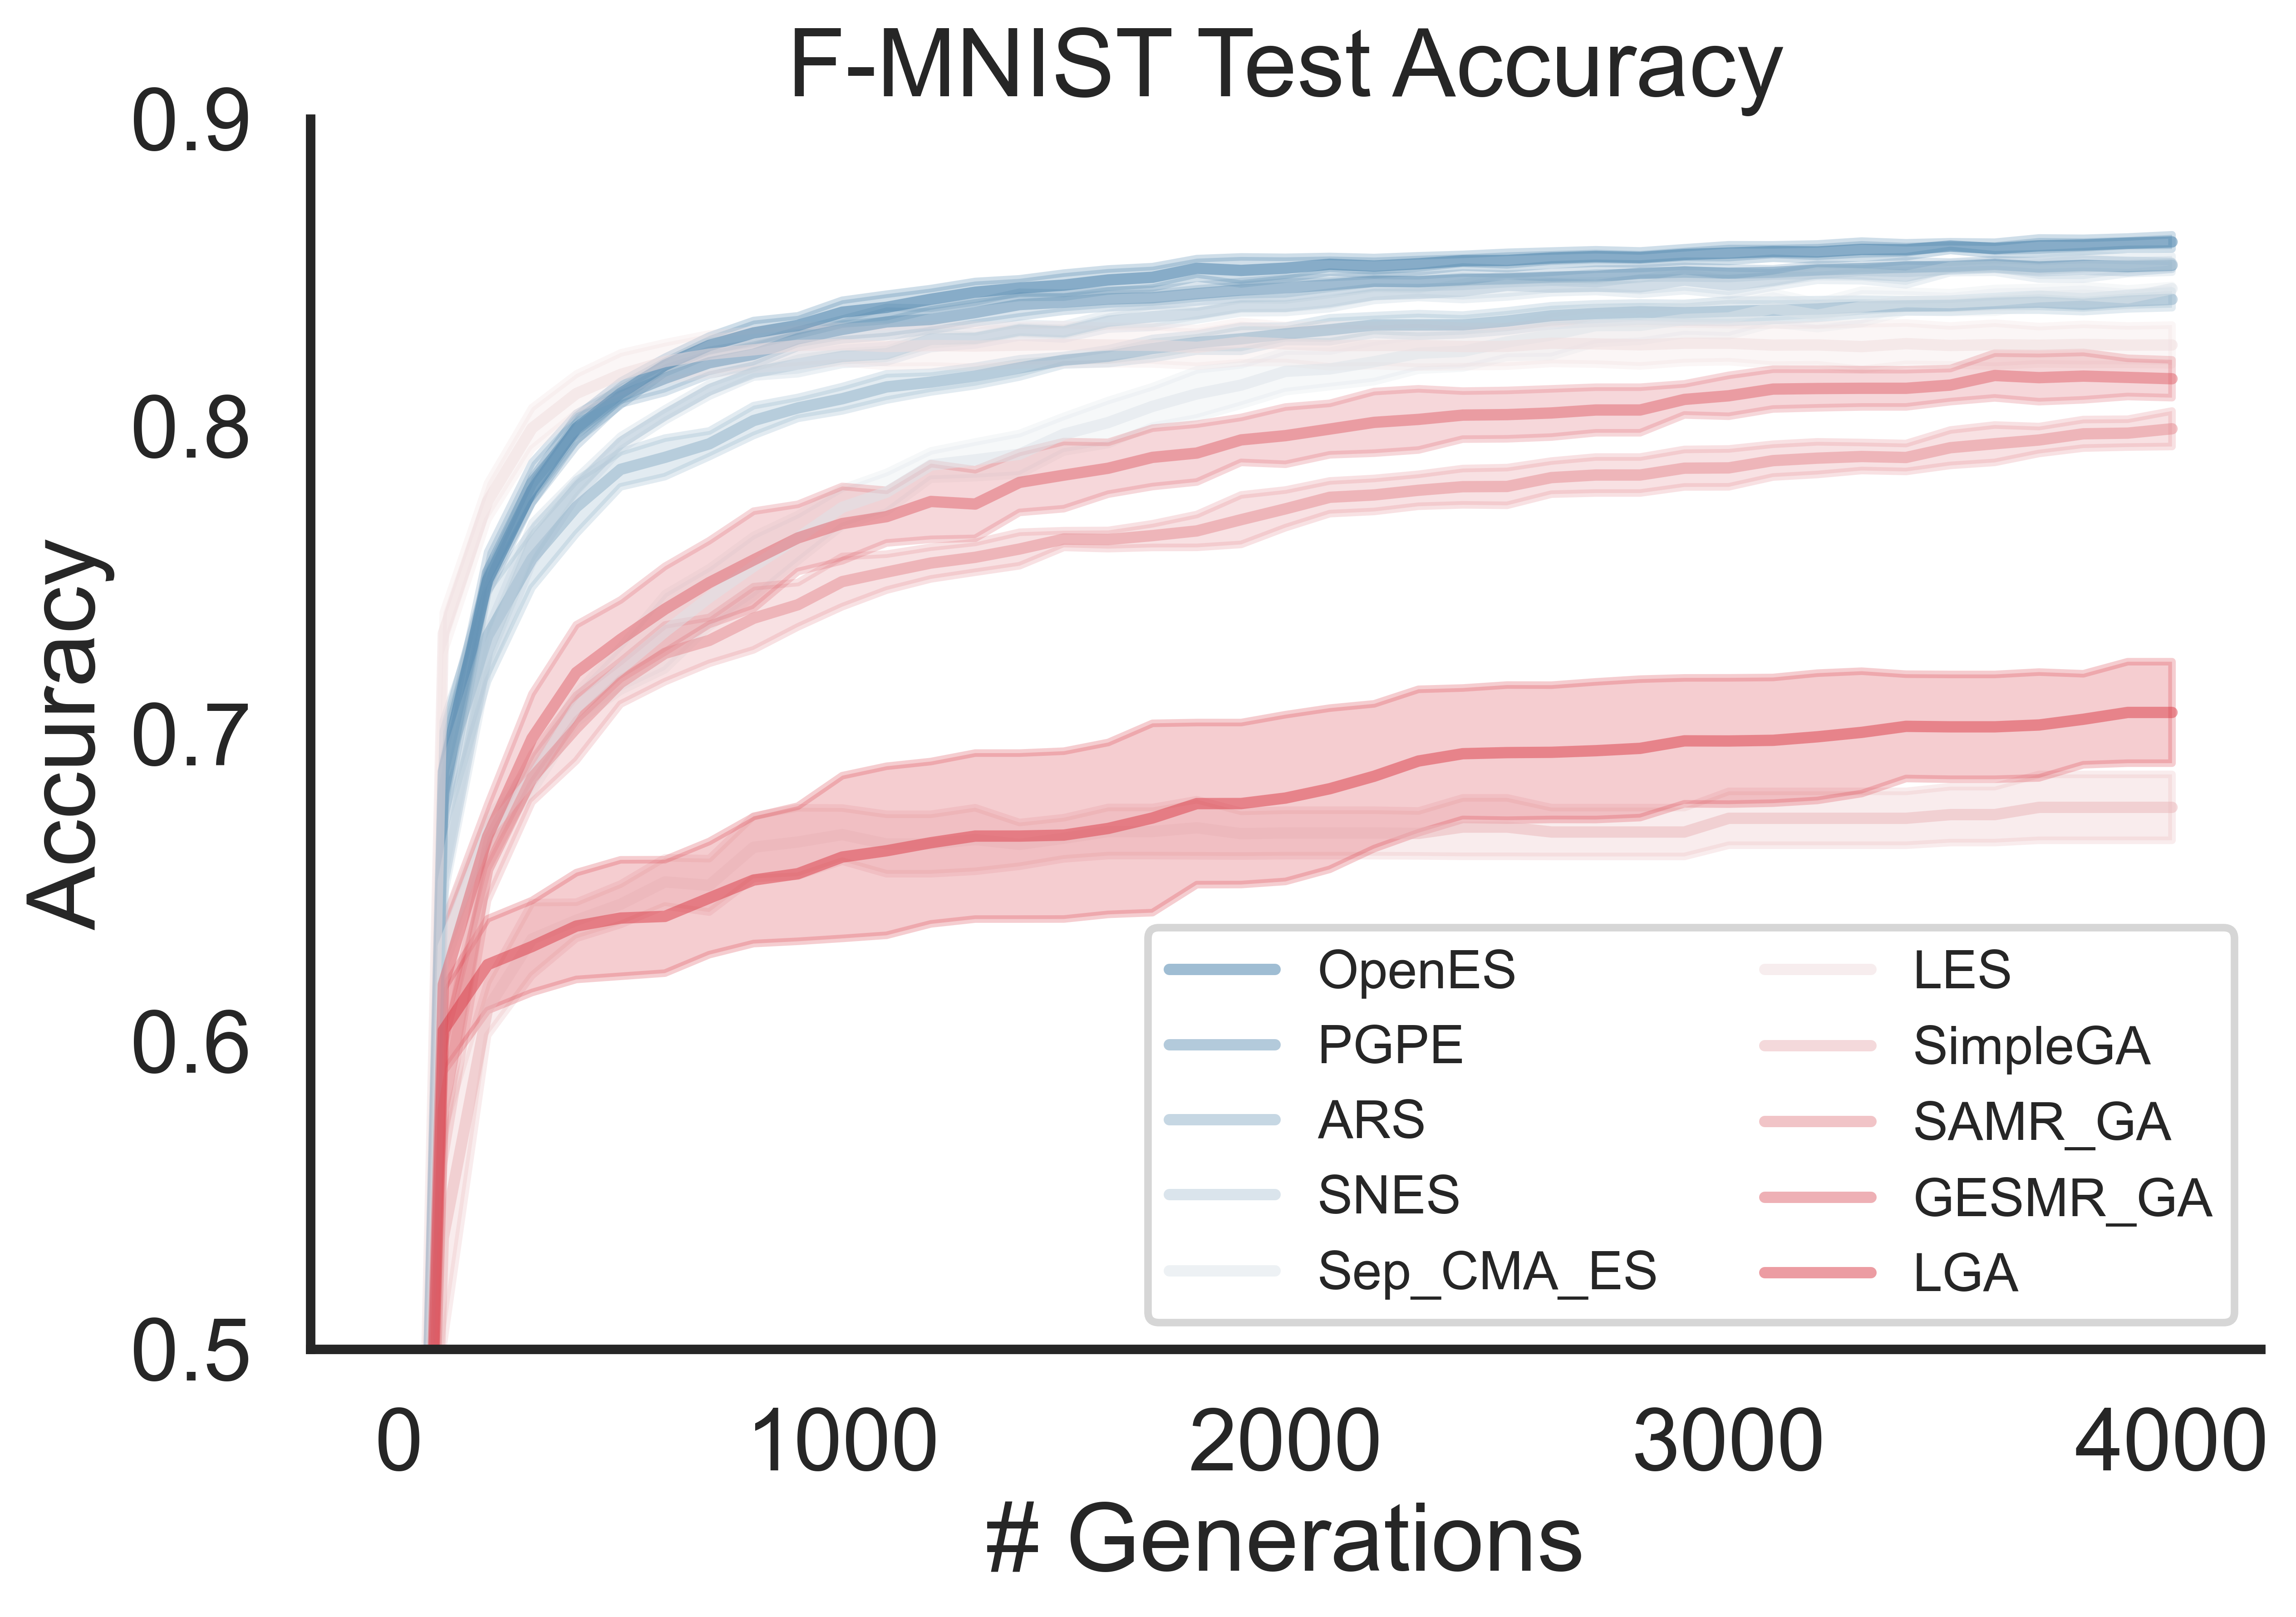

In [22]:
meta_log, hyper_log = load_result_logs("../experiments/fmnist_classify/eval")
strategy_names = hyper_log.strategy_name.unique()


fig, ax = plt.subplots(figsize=(9, 6.5))
fig, ax = visualize_1D_lcurves(meta_log,
                               iter_to_plot="num_gens",
                               target_to_plot="test_eval_perf",
                               smooth_window=1,
                               plot_title= "F-MNIST Test Accuracy",
                               xy_labels = ["# Generations", "Accuracy"],
                               base_label=r"{}",
                               curve_labels=strategy_names,
                               every_nth_tick= 10,
                               plot_ste_bar= True,
                               fig=fig, ax=ax)
ax.legend(ncol=2, fontsize=14)
ax.set_ylim([0.5, 0.9])